# Exercise 1

Student name: Sirajum Monira Bipasha

Student id: 2325118

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The data set, loosely based on Canadian salary information, is defined in the next cell. Numpy array ages contains the ages of the individual persons in the sample, and corresponding entry in array salaries contains the salary.

In [2]:
ages = np.array([77,70,16,14,15,41,42,45,46,50,51,35,36,37,16,23,22,16,17,17,25,34,33,30,27,27,28,35,44,40,42,38,38,45,54,48,54,50,55,64,60,55,57,65,68,72,68]).reshape(-1,1)
salaries = np .array([1600,2600,200,0,100,5250,5340,5100,5120,5700,5750,4900,5000,5000,1100,1650,1660,700,600,800,3670,4900,4600,4000,3900,4000,4100,4800,5500,5000,5000,4900,5200,5600,6000,5800,5700,5770,4600,4300,4800,5100,5500,4000,3400,3100,3450])

## Step 1: visualise the data

Visualise the data set by plotting the individual observations (age, salary) pairs as dots in 2D coordinates.

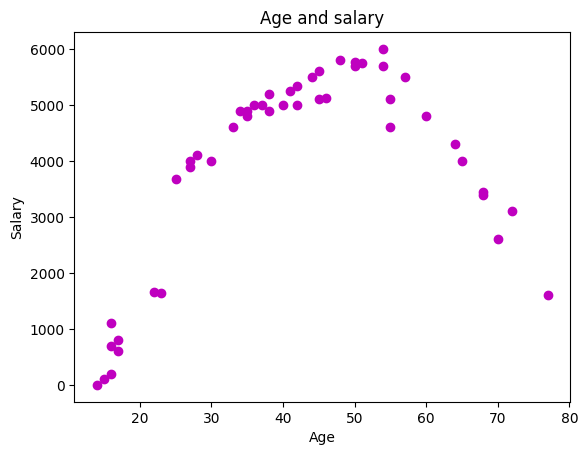

In [7]:
plt.plot(ages,salaries,'mo')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age and salary')
plt.show()

## Step 2: standardise the data

Use sklearn StandardScaler to standardise the data. Standardise only age, dependent variable salary is not standardised. Visualise the data in the same way as in previous step. The plot should look similar, only x-axis scale is changed.

In [4]:
#standardise data (= standardise age, dependent variable is not standardised)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a_s = scaler.fit_transform(ages)

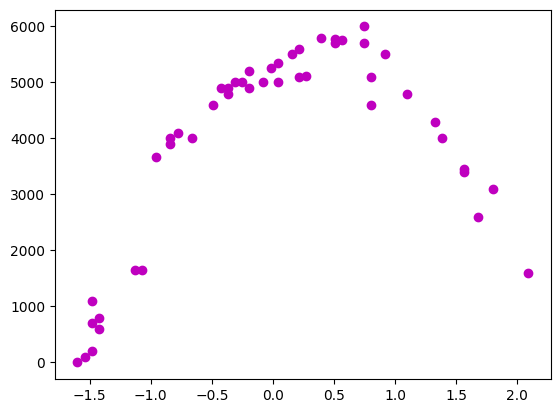

In [8]:
plt.plot(a_s,salaries,'mo')
plt.show()

## Step 3: Divide data into training, validation and test sets

First divide the available data into development and test sets. Use 20% for the test set. Use parameter random_state=42 in train_test_split function to make the split repeatable.

Next, divide the development set further into training and validation sets. Use 30% of the development set for the validation.

Last, visualise training, validation and test sets by plotting them with different colors (for example 'ro', 'bo' and 'go').

In [6]:
#split data into training and validation set and test set
from sklearn.model_selection import train_test_split
dev_x, test_x,dev_y, test_y = train_test_split(a_s,salaries,test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(dev_x, dev_y, test_size=0.3, random_state=42)
print(dev_x.shape, dev_y.shape, test_x.shape, test_y.shape)
print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)

(37, 1) (37,) (10, 1) (10,)
(25, 1) (25,) (12, 1) (12,)


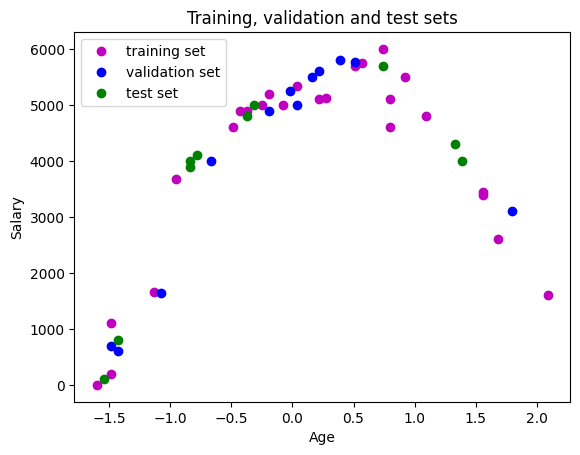

In [9]:
#plot training, validation and test sets
plt.plot(train_x, train_y, 'mo', label='training set')
plt.plot(val_x, val_y, 'bo', label='validation set')
plt.plot(test_x, test_y, 'go', label='test set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Training, validation and test sets')
plt.legend()
plt.show()

## Step 4: Create a linear model

Create linear regression model from the training data and assign the model to variable model_linear.

Plot the training set, validation set and model.

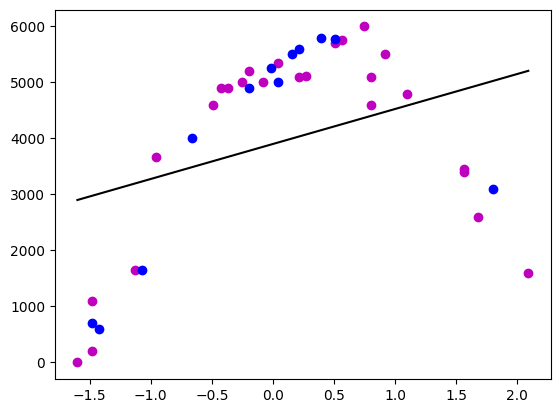

0.2720581144727887


In [11]:
from typing import Set
# create a linear model and plot the model together with training and validation sets
from sklearn.linear_model import LinearRegression
modlin = LinearRegression()
modlin.fit(train_x, train_y)
training_set = np.linspace(a_s.min(), a_s.max(), 100).reshape(-1,1)
validate_set = modlin.predict(training_set)
plt.plot(train_x, train_y,'mo')
plt.plot(val_x, val_y,'bo')
plt.plot(training_set,validate_set,'k-')
plt.show()
lvs = modlin.score(val_x, val_y)
print(lvs)

In [12]:
train_score = modlin.score(train_x, train_y)
lvs = modlin.score(val_x, val_y)
print(lvs)
print(train_score)

0.2720581144727887
0.13056339923949167


## Step 5: Compute linear regression model score

Compute the training and validation scores for the linear regression model.

In [13]:
# compute validation score (and training score)
train_score = modlin.score(train_x, train_y)
lvs = modlin.score(val_x, val_y)
print(lvs)
print(train_score)

0.2720581144727887
0.13056339923949167


## Step 6: 3rd order polynomial model

Create 3rd order polynomial model by 1) preprocessing the training data with PolynomialFeatures object, and 2) fitting a model to the polynomial data.

Plot the training set, validation set and model.

Compute the training and validation scores for the polynomial model.

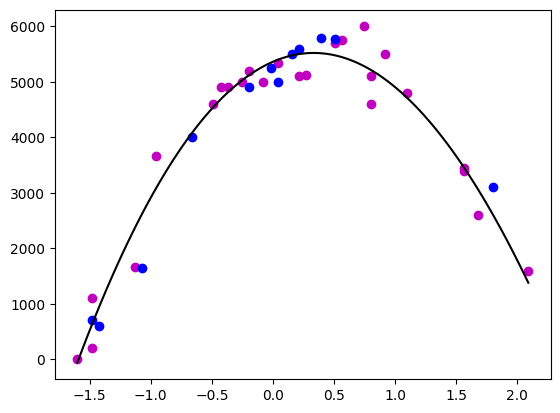

In [24]:
# fit a 3rd order polynomial to the data
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
val_x_poly = poly.fit_transform(val_x)
training_set_poly= poly.transform(np.linspace(a_s.min(), a_s.max(), 100).reshape(-1, 1))
test_x_poly = poly.transform(test_x)
dev_x_poly = poly.transform(dev_x)
mopo = LinearRegression()
mopo.fit(train_x_poly, train_y)
validate_set_poly = mopo.predict(training_set_poly)
plt.plot(train_x, train_y,'mo')
plt.plot(val_x, val_y,'bo')
plt.plot(np.linspace(a_s.min(), a_s.max(), 100), validate_set_poly,'k-')
plt.show()


In [25]:
validationscore = mopo.score(train_x_poly, train_y)
trainingscore = mopo.score(val_x_poly, val_y)
print(trainingscore)
print(validationscore)
# your code here

0.9613780343583749
0.9580433634281189


In [26]:
validationscore = mopo.score(train_x_poly, train_y)
trainingscore = mopo.score(val_x_poly, val_y)
print(trainingscore)
print(validationscore)

0.9613780343583749
0.9580433634281189


## Step 7: Train the final model and verify it

Pick the better of the two models (based on validation scores), recreate the model object and fit it with all development data. Assign the result to variable final_model.

Compute score for the final model using test set. Is the result acceptable?

In [37]:
# train polynomial model with all development data and verify performance with test set
fin = LinearRegression()
fin.fit(dev_x_poly, dev_y)
trainingscore = fin.score(dev_x_poly, dev_y)
print(trainingscore)
testscore = fin.score(train_x_poly, train_y)
print(testscore)


0.9614409116133243
0.9556124028427394


## Step 8: Make predictions and reflect

Use the model to predict salary for the following ages: 24, 46, 66, 5, 89. What do you think about the results? In what age range does the model give sensible predictions? (Remember to scale the ages using the same scaler you used for scaling the training data).

In [41]:
myages = np.array([24, 46, 66, 5, 89])
myages = np.array([24, 46, 5, 89]).reshape(-1, 1)
mscale = scaler.transform(myages)
mapoly = poly.transform(mscale)
predications = fin.predict(mapoly)
salis = []
for ages, salaries in zip([24, 46, 5, 66, 89], predications):
  salis.append(salaries)
  print(salaries)
# your code here

2716.2558740351083
5513.527829322477
-3547.459060809895
-2658.8627047810787


Your answer here.